In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Read CSV file into pandas dataframe
df = pd.read_csv("Car Sales.csv")

# Display basic information
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
df.head(5)

Dataset shape: (23906, 16)

Column names:
['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region']


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [26]:
#check the data type of the columns and the number of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [92]:
# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Show duplicate rows if any exist
if df.duplicated().sum() > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated()])



Duplicate rows: 0


In [ ]:
#rename Price ($) column to Price
df.rename(columns={'Price ($)': 'Price'}, inplace=True)

#clean up column names by removing spaces
df.columns = df.columns.str.strip()

df.head()


,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price,Body Style,Dealer_Region
0,1/2/2022,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


In [94]:
#changing date column datatype to datetime
df['Date'] = pd.to_datetime(df['Date'])

#check the data type of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           23906 non-null  datetime64[ns]
 1   Gender         23906 non-null  object        
 2   Annual Income  23906 non-null  int64         
 3   Dealer_Name    23906 non-null  object        
 4   Company        23906 non-null  object        
 5   Model          23906 non-null  object        
 6   Engine         23906 non-null  object        
 7   Transmission   23906 non-null  object        
 8   Color          23906 non-null  object        
 9   Price          23906 non-null  int64         
 10  Body Style     23906 non-null  object        
 11  Dealer_Region  23906 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 2.2+ MB


In [95]:
# Extract year, month for trend analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [96]:
#display statistical summary of the dataset
df[['Annual Income', 'Price']].describe()


,Annual Income,Price
count,2.390600e+04,23906.000000
mean,8.308403e+05,28090.247846
std,7.200064e+05,14788.687608
min,1.008000e+04,1200.000000
25%,3.860000e+05,18001.000000
50%,7.350000e+05,23000.000000
75%,1.175750e+06,34000.000000
max,1.120000e+07,85800.000000


In [97]:
# Remove outliers from columns using IQR method
def remove_outliers(df, column):
    # Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Print statistics about outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    print(f"\nOutlier statistics for {column}:")
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Outliers found: {outlier_count} ({outlier_count/df.shape[0]*100:.2f}% of data)")
    
    # Create a new dataframe without outliers
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"Rows after outlier removal: {df_clean.shape[0]} (removed {df.shape[0] - df_clean.shape[0]} rows)")
    
    return df_clean

In [98]:
#create a cleaned dataframe without outliers in Annual Income for comparison
df_clean = remove_outliers(df, 'Annual Income')

print("Comparison of statistics before and after outlier removal:")
stats_comparison = pd.DataFrame({
        'Original': df['Annual Income'].describe(),
        'After Outlier Removal': df_clean['Annual Income'].describe()
    })
print(stats_comparison)


Outlier statistics for Annual Income:
Q1: 386000.00, Q3: 1175750.00, IQR: 789750.00
Lower bound: -798625.00, Upper bound: 2360375.00
Outliers found: 816 (3.41% of data)
Rows after outlier removal: 23090 (removed 816 rows)
Comparison of statistics before and after outlier removal:
           Original  After Outlier Removal
count  2.390600e+04           2.309000e+04
mean   8.308403e+05           7.496422e+05
std    7.200064e+05           5.636098e+05
min    1.008000e+04           1.008000e+04
25%    3.860000e+05           3.600000e+05
50%    7.350000e+05           7.150000e+05
75%    1.175750e+06           1.100000e+06
max    1.120000e+07           2.360000e+06


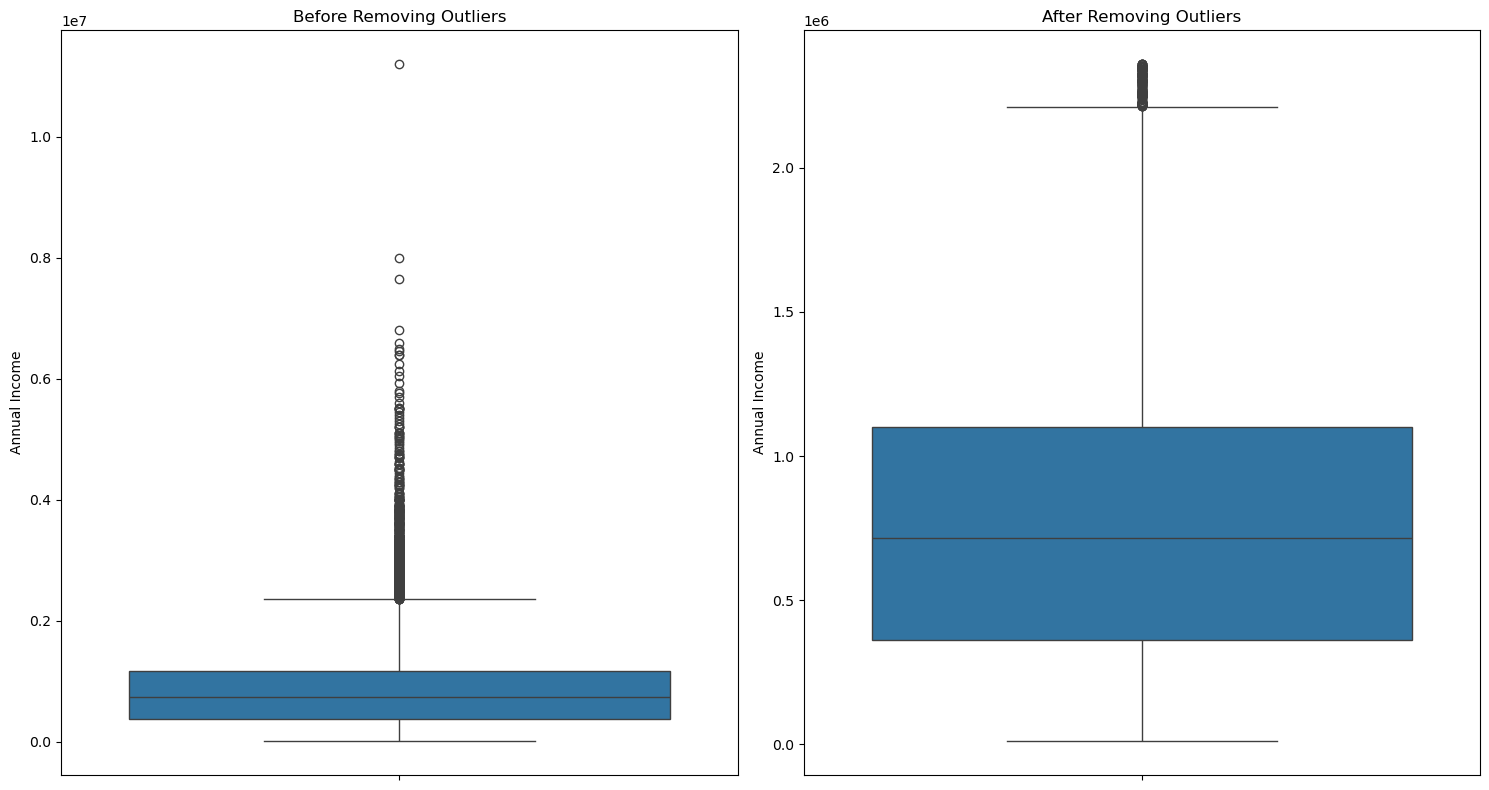

In [99]:
#boxplots of Annual Income before and after outlier removal
plt.figure(figsize=(15, 8))
    
# Before removing outliers - Box plot
plt.subplot(1, 2, 1)
sns.boxplot(df['Annual Income'])
plt.title('Before Removing Outliers')
plt.ylabel('Annual Income')
    
# After removing outliers - Box plot
plt.subplot(1, 2, 2)
sns.boxplot(df_clean['Annual Income'])
plt.title('After Removing Outliers')
plt.ylabel('Annual Income')
    
plt.tight_layout()
plt.savefig('outlier_comparison_boxplot.png')
plt.show()

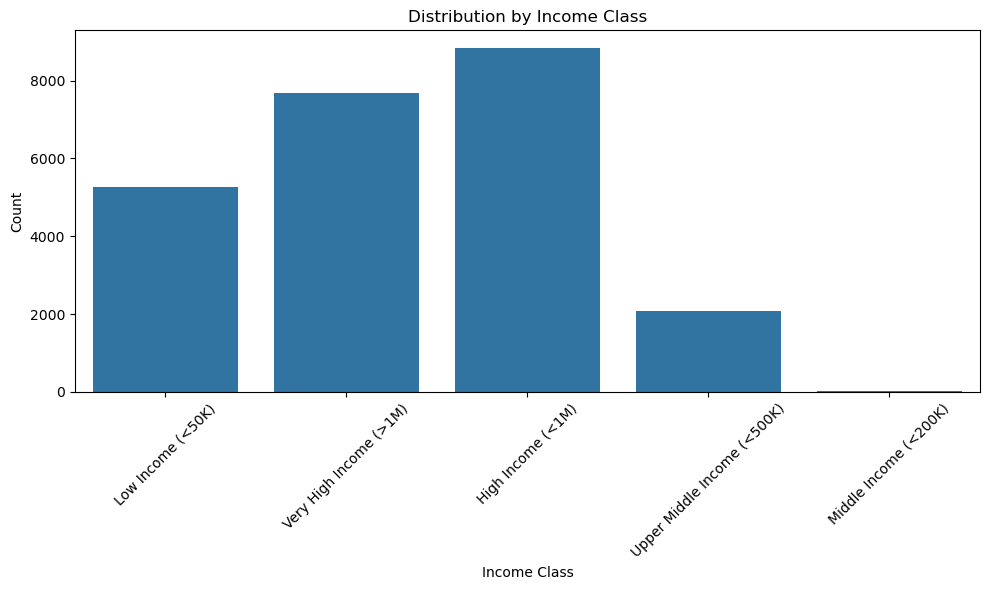

In [152]:
# Define a function to categorise income
def categorise_income(income):
    if pd.isna(income):
        return 'Unknown'
    
    if income < 50000:
        return 'Low Income (<50K)'
    elif income < 200000:
        return 'Middle Income (<200K)'
    elif income < 500000:
        return 'Upper Middle Income (<500K)'
    elif income < 1000000:
        return 'High Income (<1M)'
    else:
        return 'Very High Income (>1M)'
        
# Apply the function to create a new column
df['Income Class'] = df['Annual Income'].apply(categorise_income)

# Create a visualization of the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Income Class', data=df)
plt.title('Distribution by Income Class')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [113]:
#analyse sales trends

#monthly sales trend
monthly_sales = df.groupby(['Year', 'Month']).size().reset_index(name='sales_count')
print("\nMonthly Sales Trend:")
print(monthly_sales.head())

#company monthly sales trend
company_monthly_sales = df.groupby(['Company', 'Year', 'Month']).size().reset_index(name='sales_count')
print("\nCompany Monthly Sales Trend:")
print(company_monthly_sales.head())





Monthly Sales Trend:
   Year  Month  sales_count
0  2022      1          315
1  2022      2          320
2  2022      3          705
3  2022      4          800
4  2022      5          750

Company Monthly Sales Trend:
  Company  Year  Month  sales_count
0   Acura  2022      1           10
1   Acura  2022      2           14
2   Acura  2022      3           24
3   Acura  2022      4           25
4   Acura  2022      5           26


In [102]:
#average price by company
average_price_by_company = df.groupby('Company')['Price'].mean().sort_values(ascending=False).reset_index(name='Average Price')
print("\nAverage Price by Company:")
print(average_price_by_company.head())

#average price by model
average_price_by_model = df.groupby('Model')['Price'].mean().sort_values(ascending=False).reset_index(name='Average Price')
print("\nAverage Price by Model:")
print(average_price_by_model.head())

#total sales for each company
total_sales_by_company = df['Company'].value_counts().sort_values(ascending=False).reset_index(name='Total Sales')
print("\nTotal Sales by Company:")
print(total_sales_by_company.head())



Average Price by Company:
      Company  Average Price
0    Cadillac   40972.093558
1        Saab   36516.338095
2       Lexus   34024.567332
3       Buick   33634.362187
4  Oldsmobile   31894.250225

Average Price by Model:
     Model  Average Price
0   Catera   56836.933333
1  DeVille   46154.050000
2  Contour   45309.079646
3  Integra   44604.000000
4   Tacoma   44576.743017

Total Sales by Company:
      Company  Total Sales
0   Chevrolet         1819
1       Dodge         1671
2        Ford         1614
3  Volkswagen         1333
4  Mercedes-B         1285


In [124]:
#total revenue by company
total_revenue_by_company = df.groupby('Company')['Price'].sum().sort_values(ascending=False).reset_index(name='Total Revenue')
print("\nTotal Revenue by Company:")
print(total_revenue_by_company.head())


Total Revenue by Company:
      Company  Total Revenue
0   Chevrolet       47655265
1        Ford       47231583
2       Dodge       44124996
3  Oldsmobile       35434512
4  Mercedes-B       34624123


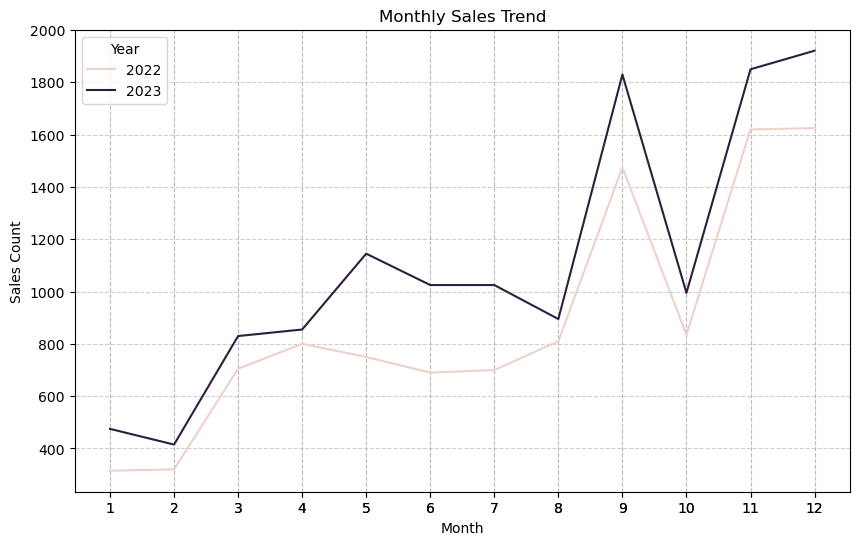

In [114]:
#visualising monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='sales_count', data=monthly_sales, hue='Year')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.xticks(monthly_sales['Month'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Year')
plt.savefig('monthly_sales_trend.png')
plt.show()


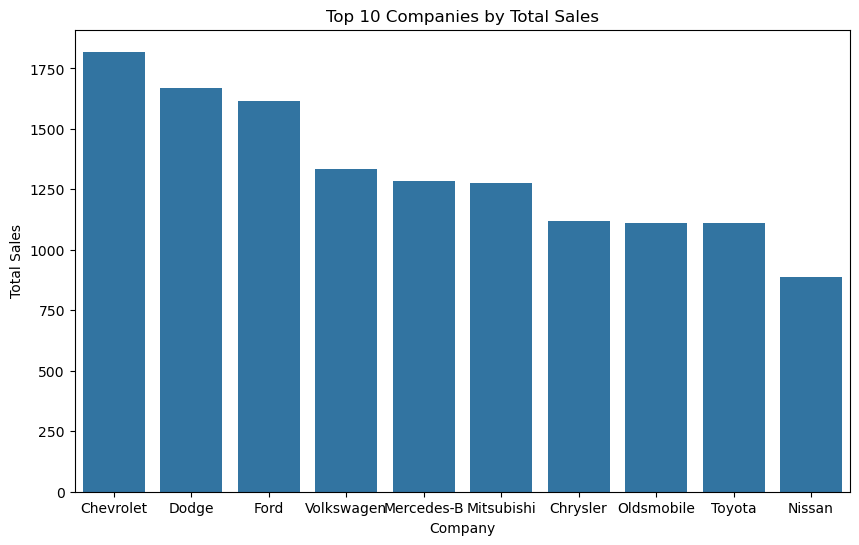

In [122]:
#visualise total sales by company
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Total Sales', data=total_sales_by_company.head(10))
plt.title('Top 10 Companies by Total Sales')
plt.xlabel('Company')
plt.ylabel('Total Sales')
plt.savefig('top_10_companies_total_sales.png')
plt.show()

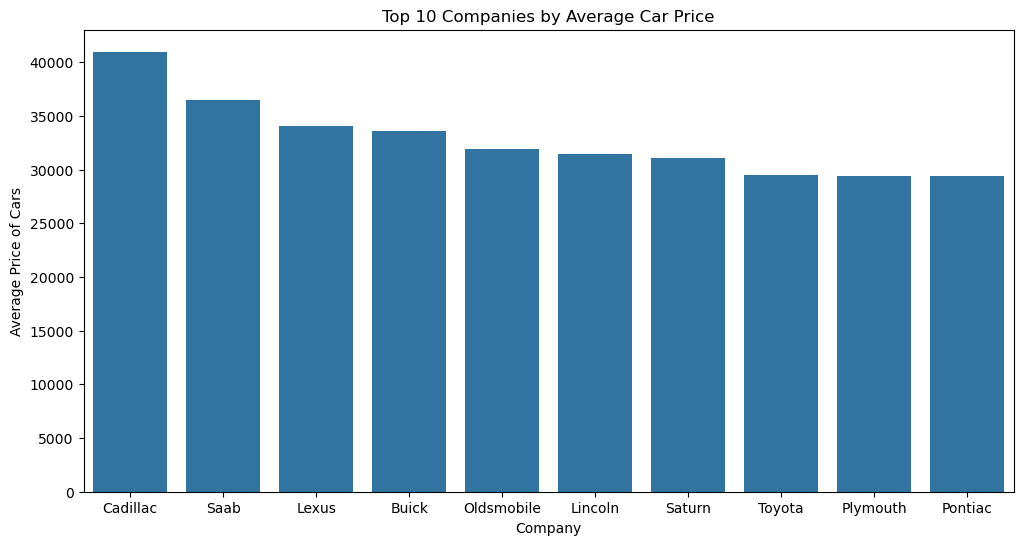

In [119]:
#visualise top 10 average price by company
plt.figure(figsize=(12, 6))
top_10_avg_price_by_company = average_price_by_company.head(10)
sns.barplot(x='Company', y='Average Price', data=top_10_avg_price_by_company)
plt.title('Top 10 Companies by Average Car Price')
plt.xlabel('Company')
plt.ylabel('Average Price of Cars')
plt.savefig('top_10_avg_price_by_company.png')
plt.show()


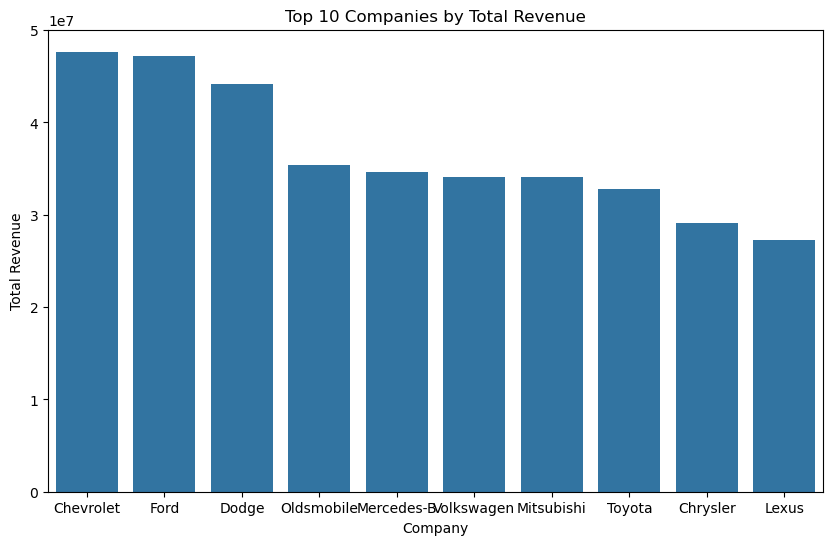

In [125]:
#visualise top 10 total revenue by company
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Total Revenue', data=total_revenue_by_company.head(10))
plt.title('Top 10 Companies by Total Revenue')
plt.xlabel('Company')
plt.ylabel('Total Revenue')
plt.savefig('top_10_companies_total_revenue.png')
plt.show()

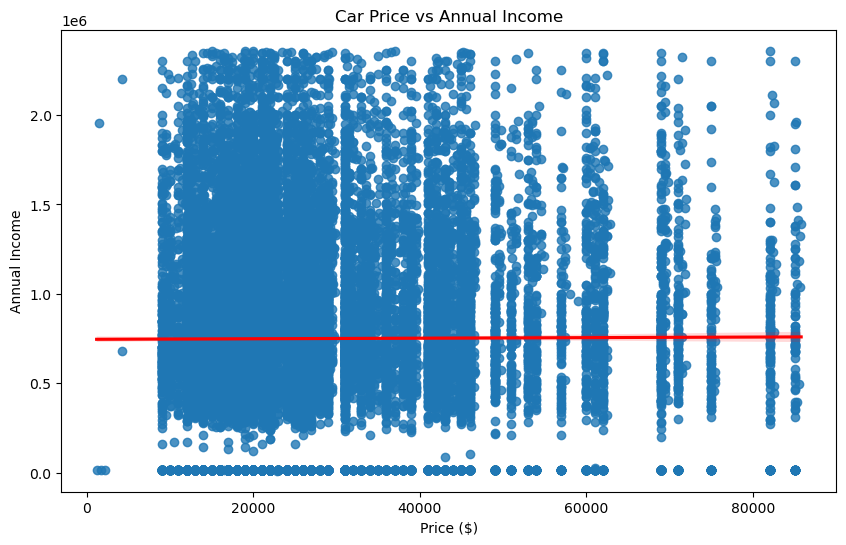

In [137]:
#scatter plot of price vs annual income without outliers
plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='Annual Income', data=df_clean, line_kws={'color': 'red'})
plt.title('Car Price vs Annual Income')
plt.xlabel('Price ($)')
plt.ylabel('Annual Income')
plt.savefig('car_price_vs_annual_income.png')
plt.show()

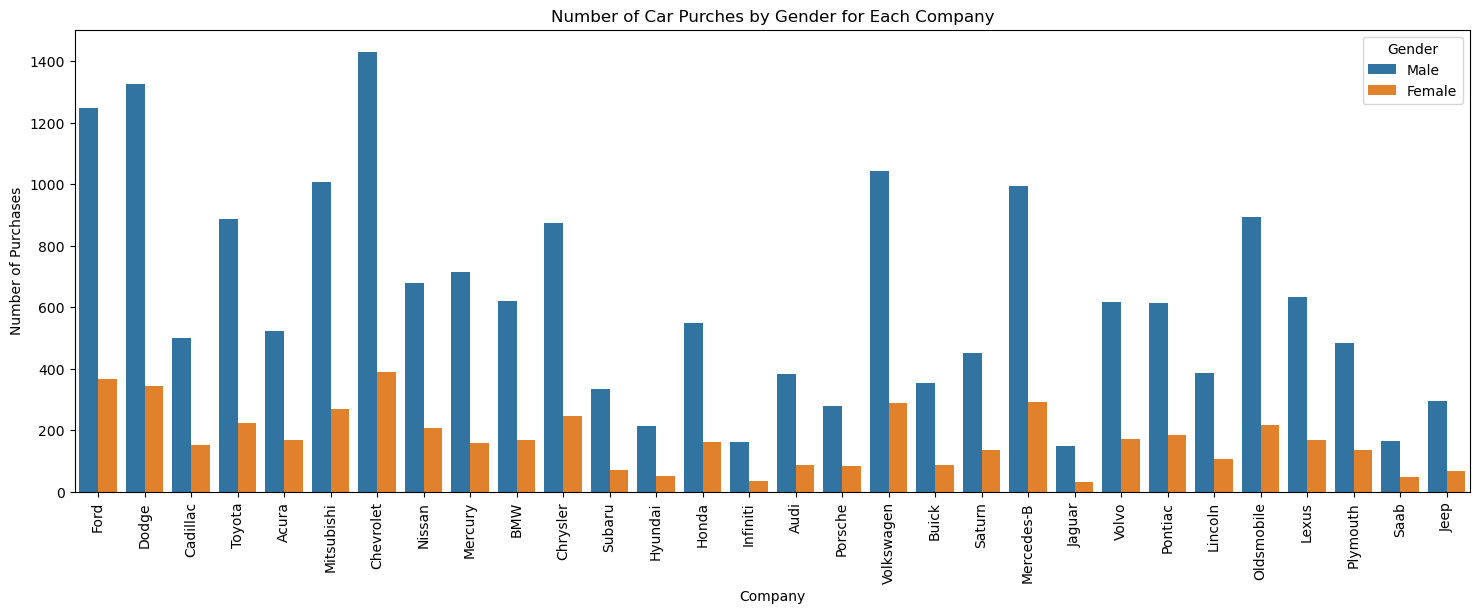

In [ ]:
#demographic analysis   

#find and plot distribution of car purchases by gender for each company
plt.figure(figsize=(18, 6))
sns.countplot(x='Company', data=df, hue='Gender')
plt.title('Number of Car Purchases by Gender for Each Company')
plt.xlabel('Company')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=90)
plt.savefig('distribution_of_car_sales_by_gender_for_each_company.png')
plt.show()

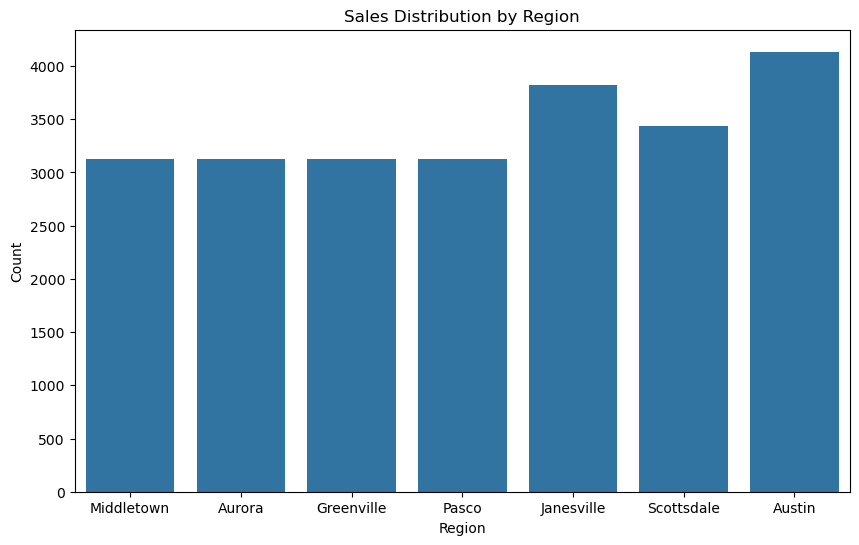

In [138]:
#find and plot sales distribution by region
plt.figure(figsize=(10, 6))
sns.countplot(x='Dealer_Region', data=df)
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.savefig('sales_distribution_by_region.png')
plt.show()


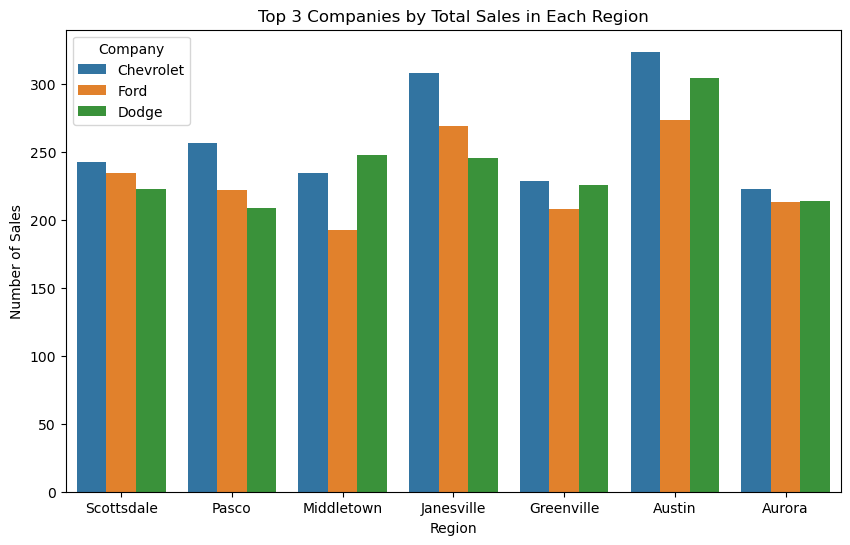

In [144]:
#find top 3 companies total sales in each region
companysales_by_region = df.groupby(['Dealer_Region', 'Company']).size().reset_index(name='Number_of_Sales')
companysales_by_region_sorted = companysales_by_region.sort_values(['Dealer_Region', 'Number_of_Sales'], ascending=False)
top3company_by_region = companysales_by_region_sorted.groupby('Dealer_Region').head(3)

#visualise top 3 companies in each region
plt.figure(figsize=(10, 6))
sns.barplot(x='Dealer_Region', y='Number_of_Sales', data=top3company_by_region, hue='Company')
plt.title('Top 3 Companies by Total Sales in Each Region')
plt.xlabel('Region')
plt.ylabel('Number of Sales')
plt.legend(title='Company')
plt.savefig('top_3_companies_by_region.png')
plt.show()


In [153]:
#save df to csv file
df.to_csv('Car Sales.csv', index=False)